In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Data file as variable
stroke_predictive_path = "data/healthcare-dataset-stroke-data.csv"

In [3]:
# Read .csv file
stroke_predictive_df = pd.read_csv(stroke_predictive_path)

# Display preview of data
stroke_predictive_df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
# Find number of individual participants
stroke_predictive_df["id"].nunique()
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Change columns to all lower case to match
stroke_predictive_df = stroke_predictive_df.rename(columns=str.lower)
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
# Check of dublicate IDs
# None found
duplicate_check = stroke_predictive_df.drop_duplicates(subset=["id"])
print(len(duplicate_check))

5110


In [7]:
# Check if any columns should be dropped
# All look appropriate, but bmi has 111 fewer rows of data
stroke_predictive_df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [8]:
# Drop rows with missing data so all match bmi's total
stroke_predictive = stroke_predictive_df.dropna(how='any')
stroke_predictive.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [9]:
# 895 subjects are minors 18 and under
# 574 subjects are children 12 and under
# 953 subjects are sections 65 and over

minor_check = stroke_predictive[stroke_predictive.age <= 18]
senior_check = stroke_predictive[stroke_predictive.age >= 65]
child_check = stroke_predictive[stroke_predictive.age <= 12]
print(minor_check["id"].nunique(), 
      child_check["id"].nunique(), 
      senior_check["id"].nunique())

895 574 953


In [10]:
# Unique entries for column work_type (5)
# Clean
stroke_predictive["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [11]:
# Unique entries for column ever_married (2)
# Clean
stroke_predictive["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
# Unique entries for column residence_type (2)
# Clean
stroke_predictive["residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [13]:
# Unique entries for column smoking_status (4)
# Clean
stroke_predictive["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [14]:
stroke_predictive.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# The Correlation Between BMI and Stroke Occurrence

In [15]:
# Establish the bins for bmi
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III']

In [16]:
# Creating a copy of the stroke prediction for later aggregations
stroke_predictive_bmi_df = stroke_predictive.copy()

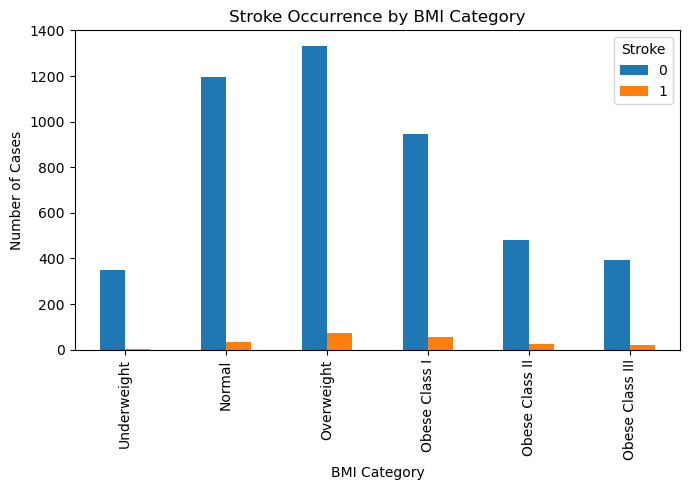

In [17]:
# Add a BMI category column
stroke_predictive_bmi_df['bmi_category'] = pd.cut(stroke_predictive_bmi_df['bmi'], bmi_bins, labels=bmi_labels, include_lowest=True)

# Grouping by BMI category and stroke occurrence 
#used this link to know how to use unstack https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
bmi_stroke_group = stroke_predictive_bmi_df.groupby(['bmi_category', 'stroke']).size().unstack(fill_value=0)

# Plot bar chart
bmi_stroke_group.plot(kind='bar', figsize=(7,5))

#Giving the chart some labels
plt.title('Stroke Occurrence by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Cases')

# Adding a legend and sets its location to the upper right and added a title 
plt.legend(loc="upper right", title='Stroke')

#Adjusting the layout of the plot to ensure proper spacing of elements
plt.tight_layout()

# Saving the figure
plt.savefig("data/Stroke Occurrence by BMI Category.png")

#Displaying the chart
plt.show()


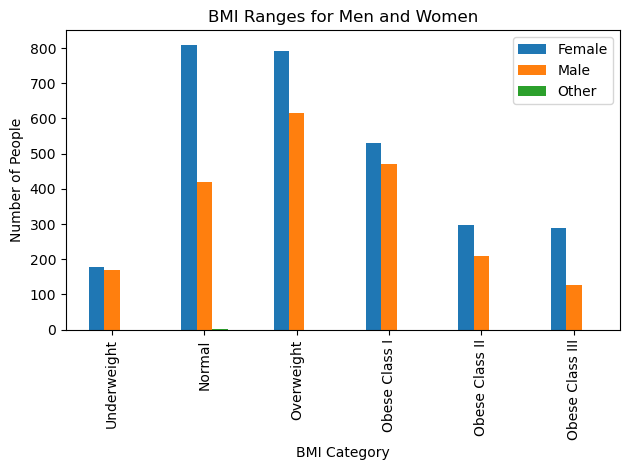

In [18]:
# Group by gender and BMI category
bmi_gender_group = stroke_predictive_bmi_df.groupby(['bmi_category', 'gender']).size().unstack(fill_value=0)

# Plot stacked bar chart
bmi_gender_group.plot(kind='bar')

#Giving the chart some labels
plt.title('BMI Ranges for Men and Women')
plt.xlabel('BMI Category')
plt.ylabel('Number of People')

# Adding a legend
plt.legend()

#Adjusting the layout of the plot to ensure proper spacing of elements
plt.tight_layout()

# Saving the figure
plt.savefig("data/BMI Ranges for Men and Women.png")

#Displaying the chart
plt.show()


In [19]:
# Establish the bins for age
age_bins = [40, 50, 60, 70, 80, 90]  # Define age ranges
age_labels = ['40-50', '50-60', '60-70', '70-80', '80-90']  # Label each range

In [20]:
# Separating the data by the patients who have a stroke
bmi_stroke_patients = stroke_predictive[stroke_predictive['stroke'] == 1]

# Adding a age group column
bmi_stroke_patients['age_group'] = pd.cut(bmi_stroke_patients['age'], bins=age_bins, labels=age_labels)


In [21]:
# Separating the data by the patients who doesn't have a stroke
bmi_no_stroke_patients = stroke_predictive[stroke_predictive['stroke'] == 0]

# Adding a age group column
bmi_no_stroke_patients['age_group'] = pd.cut(bmi_no_stroke_patients['age'], bins=age_bins, labels=age_labels)

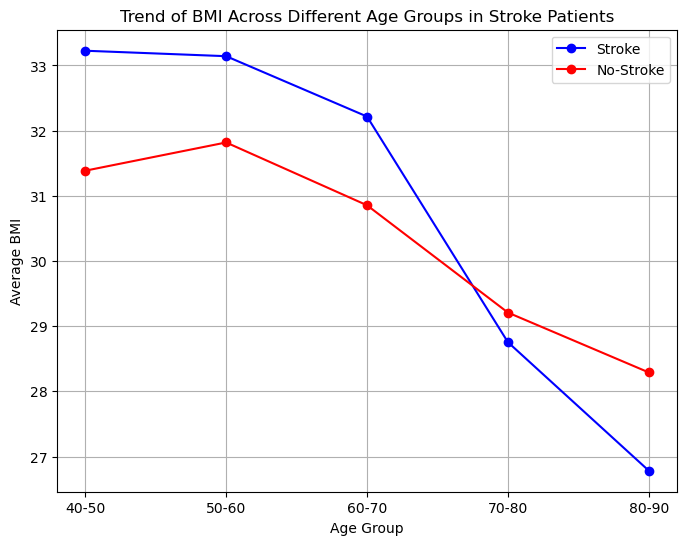

In [22]:
# Calculating average BMI for each age group
stroke_avg_bmi_by_age = bmi_stroke_patients.groupby('age_group')['bmi'].mean()
no_stroke_avg_bmi_by_age = bmi_no_stroke_patients.groupby('age_group')['bmi'].mean()

#Creating the figure for the line plot with a specific size
plt.figure(figsize=(8,6))

# Plotting the line charts for the stroke and no stroke data
plt.plot(stroke_avg_bmi_by_age.index, stroke_avg_bmi_by_age.values, marker='o', linestyle='-', color='blue', label='Stroke')
plt.plot(no_stroke_avg_bmi_by_age.index, no_stroke_avg_bmi_by_age.values, marker='o', linestyle='-', color='red', label='No-Stroke')

#Giving the chart some labels
plt.title('Trend of BMI Across Different Age Groups in Stroke Patients')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')

# Adding grid lines to the chart
plt.grid(True)

# Adding a legend and sets its location to the upper right
plt.legend(loc="upper right")

# Saving the figure
plt.savefig("data/Trend of BMI Across Different Age Groups in Stroke Patients.png")

#Displaying the chart
plt.show()